In [94]:
#!pip install -q keras


In [109]:
import keras
from keras.datasets import cifar10
from keras import models
from keras import layers
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [96]:
from keras import regularizers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu',
input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(40, kernel_regularizer=regularizers.l2(0.001),
activation='sigmoid'))
network.add(layers.Dense(20, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
network.add(layers.Dense(10, activation='softmax'))


In [97]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [98]:
train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255

In [99]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [100]:
history =network.fit(train_images, train_labels, epochs=25, batch_size=256)

Epoch 1/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.1624 - loss: 2.3121
Epoch 2/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.2948 - loss: 1.9853
Epoch 3/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.3439 - loss: 1.8730
Epoch 4/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.3697 - loss: 1.7968
Epoch 5/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.3921 - loss: 1.7457
Epoch 6/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.4059 - loss: 1.7046
Epoch 7/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.4194 - loss: 1.6543
Epoch 8/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.4346 - loss: 1.6246
Epoch 9/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.4480 - loss: 1.5944
Epoch 10/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.4522 - loss: 1.5748
Epoch 11/25
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.4600 - loss: 1.5606
Epoch 12/25
196/196 ━━━━━━━━━━━━━━━━

In [101]:
test_loss, test_acc = network.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4797 - loss: 1.4917


ADDITIONAL AREA

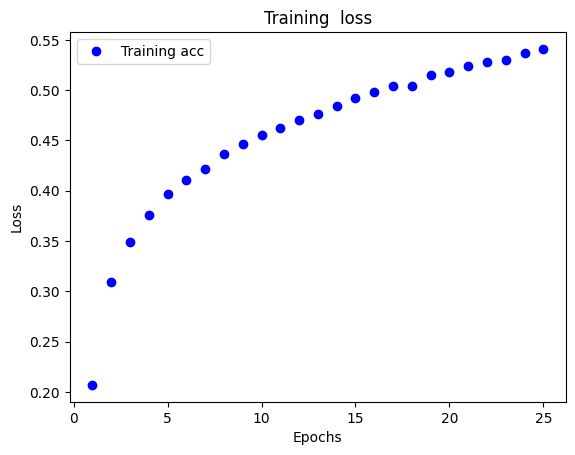

In [103]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy = history_dict['accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show accuracy

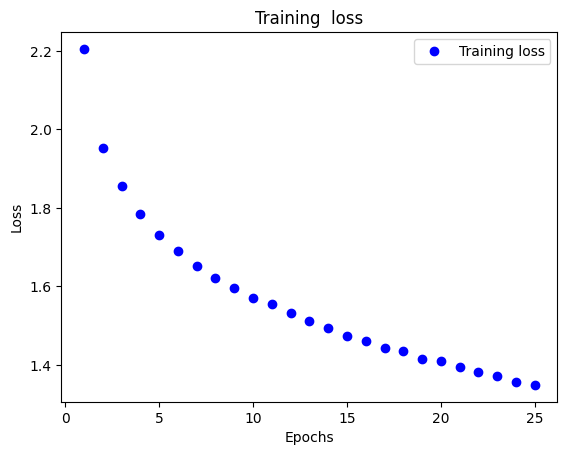

In [104]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show loss

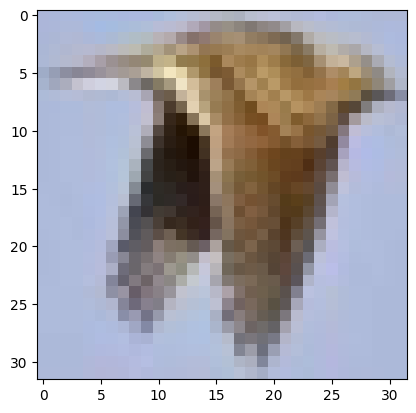

In [110]:
digit = train_images[123]
import matplotlib.pyplot as plt
plt.imshow(digit)
#plt.show(digit)